# Probability

Ryan's lecture is based on those by Adam Richards, Tammy Lee, Lee Murray, Scott Schwartz, Matthew Drury, and other Galvanize folks.

## Why Learn Probability?

Mason and Wiggins in their article ["A Taxonomy of Data Science"](http://www.dataists.com/2010/09/a-taxonomy-of-data-science/) describe what Data Scientists do by identifying and describing 5 steps, named _OSEMN_:
1. Obtain Data
2. Scrub Data
3. Explore Data
4. Model Data
5. iNterpret Data

For #3, #4, and #5 above, you'll need your Probability, Statistic, and/or Machine Learning skills ready for action. Starting with data, we may want to answer some questions like:
 - How well does the data match some assumed (null) distribution [hypothesis testing]?
 - If it doesn't match well, can we estimate the parameters to approximate it [point estimate]?
 - How accurate are the parameter estimates [interval estimates]?
 - Can we model the underlying distribution [function estimates or approximation or machine learning]?
 
The above questions are obviously pertinent to data science, but even if you take more of the ML approach, you cannot escape the topics of probability and statistics:
1. Knowing it is a right of passage.
2. Most ML algorithms have (at least some) basis in probability/statistics. The best ML folks know deeply how each model works.

Today's topic is _probability_. We will start with __Basic Theory__ (morning) then move on to the __Major Probability Distributions__ and applications therein (afternoon).

Specifically, we will cover:

**Morning**:
* Review Formal Logic, and discuss why it doesn't quite give us what we need.
* Introduce Probability, Random Variables, and Sample Spaces.
* Review Set Notations and Set Operations.
* Discuss Probability Notation and The Basic Laws of Probability.
* Introduce Combinatorics, and why it's useful.
* Define Permutations and Combinations.
* Practice with 5 probability questions.
* Introduce expected value, variance, covariance, and correlation.
* Discuss why correlation is not causation! Reference xkcd and Anscombe's Quartet.

**Afternoon**:
* Write a program to generate a probability tree to solve a probability problem.
* Differentiate between discrete and continuous (random) variables.
* Major probability distributions
    * Discrete: Bernoulli, Binomial, Geometric, Poisson
    * Continuous: Uniform, Normal, Exponential
* Define Joint Probability Distributions
* Define Marginalization

## Basic Theory

### Logic Symbology

| Symbol       | Meaning           |
|--------------|-------------------|
| $\vee$       | or                |
| $\wedge$     | and               |
| $\neg$       | not               |
| $\implies$   | implies (if-then) |
| $\iff$       | if and only if    |
| $|$          | such that         |
| $\forall$    | for all           |
| $\therefore$ | therefore         |
| [more](https://en.wikipedia.org/wiki/List_of_logic_symbols) |  |

### Formal Logic

Statements are either True or False.

$a \implies b$, means:
- If $a$ is True, then $b$ must be True.
- If $b$ is False, then $a$ must be False.

$a \wedge b$, means:
- (sometimes written $ab$)
- $a$ and $b$ are both True.

$a \vee b$, means:
- (sometimes written $a+b$)
- Either $a$ is True, or $b$ is True, or both are True.

$\neg a$, means:
- $a$ is False.

... and more.

A few extra rules which follow from above:

- $aa = a$
- $a+a = a$
- $ab = ba$
- $a + b = b + a$
- $a(bc) = (ab)c = abc$
- $a + (b + c) = (a + b) + c = a + b + c$
- $a(b + c) = ab + ac$
- $a + bc = (a + b)(a + c)$

And a famous one: DeMorgan's law:
- $\neg (a \vee b) \iff \neg a \wedge \neg b$
- $\neg (a \wedge b) \iff \neg a \vee \neg b$

### Shortcomings of Formal Logic

Formal Logic is fun, but it doesn't allow for the inference we want to do. Instead of absolute True/False, we want to reason about the plausibility of propositions.

### Instead of Formal Logic

We want to capture the _certainty_ of an outcome $x$, which we'll call "probability" and write as $P(x)$.

$$0 \le P(x) \le 1$$

Where:
- $P(x) = 0 \iff$ the outcome $x$ is impossible, and
- $P(x) = 1 \iff$ the outcome $x$ is certain.
- $P(x) = 0.5 \iff$ the outcome $x$ will happen half of the time.

<br><font color='red'><center>How can we estimate the probability it will rain tomorrow?</center></font>

Let $x$ be the event that it rains tomorrow, so $P(x) =$ ?

### Sample Space

Now that we're talking about outcomes, and the certainty of outcomes, we need to define what are the possible outcomes. The set of all possible outcomes of an event is called the __Sample Space__. (Sometimes you'll see this called the "support" or the "domain" as well.) A few examples follow:

| Event                                       | Sample Space |
|---------------------------------------------|--------------|
| coin flip                                   | {H, T}       |
| Human heights                               | $\mathbb{R}^+$ |
| Number of slices of pizza eaten before 10am | $\mathbb{N}$   |

<br><font color='red'><center>What is the sample space of a 6-sided die?</center></font>

<font color='red'><center>What is the sample space of the next hand in blackjack?<br>(What are the possible outcomes from the player's perspective?)</center></font>

### Set Review

Now that we have a _set_ of possible outcomes, let's review the things we can do with _sets_.

**Symbols**:

| Symbol       | Meaning        |
|--------------|----------------|
| $\in$        | in             |
| $\cap$       | intersection   |
| $\cup$       | union          |
| $\emptyset$  | the empty set      |
| [more](https://en.wikipedia.org/wiki/Set_notation) | |

**Operations**:

| Operation                  | Definition                                               |
|----------------------------|----------------------------------------------------------|
| Union                      | $A\cup B=\{x\ |\ x \in A \vee x \in B\}$                 |
| Intersection               | $A \cap B=\{x\ |\ x \in A \wedge x \in B \}$             |
| Difference                 | $A \setminus B=\{x\ |\ x \in A \wedge x \notin B \}$     |
| Complement                 | $A^C=\{x\ |\ x \notin A \}$                              |
| Disjoint                   | $A \cap B=\emptyset$             |
| Partition $\{A_i\}$ (of S) |  $\forall i, j: A_i \cap A_j=\emptyset$ <br>$S=\bigcup\limits_{i=l}^{N} A_{i}$ |

<br><font color='red'><center>What does the next cell print?</center></font>

In [ ]:
a = set([3, 7, 9, 1])
b = set([6, 9, 7, 4, 2])

print a & b
print a - b

### Probability Definitions

#### Random Variable

Ryan's definition: "The outcome of an unrealized event." (Your milage may vary.) Or, "A function which generates outcomes with a fixed, internal probability of each outcome."

Random variables are hard to define...

<font color='red'><center>How would _you_ define a random variable?</center></font>

We write random variables as capital letters, which is somewhat confusion because we also tend to write sets as capital letters. We can rest (a little) easy knowing that a random variable has within it a set of possible outcomes; in fact, much of the notation used for probability treats the random variable _like a set_. So, it's all cool.

So, the random variable is written as a capital letter, cool. We write _specific outcomes_ as lowercase letters. That leads to the following notation:

$$P(X=x) = p$$

which we interpret as the probability of the random variable $X$ being realized as the _specific_ outcome $x$ is $p$.

#### Shorthand Notations

When reasoning about probability, we often only write the random variable and leave it implied that we reference an unnamed, unspecific outcome.

$$P(A) = P(A=a)$$

Both notations above are unspecific about the outcome in question, but the former leaves the outcome name omitted.

Furthermore, we often omit the _and_ operator. All below are equivalent in meaning:

$$P(AB) = P(A,B) = P(A \cap B) = P(A=a \wedge B=b)$$

Similarly, we often write the _or_ operator with an `addition` symbol. All below are equivalent in meaning:

$$P(A+B) = P(A \cup B) = P(A=a \vee B=b)$$

### Laws of Probability

#### Conditional Probability

$$P(A|B)$$

We interpret this notation as the probability over the random variable $A$ given that we know the outcome of the random variable $B$. More concretely we can write:

$$P(A=a | B=b) = p$$

to say _specifically_ the probability of an outcome $a$ given a _specific_ outcome $b$ is $p$.

The following is always true:

$$P(AB) = P(A) P(B|A)$$

$$P(AB) = P(B) P(A|B)$$

<br><font color='red'><center>Define conditional probability in your own words?</center></font>

#### Chain Rule

If you apply the conditional probability rule over-and-over, you get the chain rule:

$$
\begin{align*}
P(A, B, C) & = P(A, B) & * P(C | A, B) \\
 & = P(A) * P(B|A) & * P(C | A, B)
\end{align*}$$

Or more generically:

$$P(X_1, X_2, \dots, X_n) = \prod_{i=1}^n P(X_i|X_1, \dots, X_{i-1})$$

<br><font color='red'><center>Define the chain rule in your own words?</center></font>

#### Bayes' Rule

The axioms above lead to Bayes' Rule:

$$P(A | B) = \dfrac{P(B | A) P(A)}{P(B)}$$

<br><font color='red'><center>Derive Bayes' Rule yourself!</center></font>

#### Law of Total Probability (LoTP)

Let $S$ be the support of the (discrete) random variable $B$, then:

$$1 = \sum_{s \in S} P(B=s)$$

Similarly,

$$1 = P(B=s) + P(B \ne s)$$

Finally, the **Law of Total Probability** states that:

$$P(A) = \sum_{s \in S} P(A \cap B=s)$$

$$P(A) = \sum_{s \in S} P(A | B=s) P(B=s)$$

<br><font color='red'><center>Define LoTP in your own words?</center></font>

#### Independence

If two random variables $A$ and $B$ are independent, then the following is true:

$$P(A|B) = P(A)$$

that is, the probability of $A$ is not affected by the outcome of $B$.

Independence implies that:

$$P(A \cap B) = P(A) P(B)$$

<br><font color='red'><center>Prove it!</center></font>

#### Mutual Exclusivity

If two events $A$ and $B$ **cannot** occur simultaneously, then they are said to be "mutually exclusive" events. This implies that:

$$P(A \cap B) = 0$$

$$P(A \cup B) = P(A) + P(B)$$

<br><font color='red'><center>What is the probability your roll a 3 or a 4 on the next roll of a 6-sided die?</center></font>

### We can solve for new rules now!

#### Short Example:

$$
\begin{align*}
P(A \cup B) &= 1 - P(\neg A \cap \neg B) \\
            &= 1 - P(\neg A) P(\neg B | \neg A)   \\
            &= 1 - P(\neg A) [1-P(B|\neg A)]   \\
            &= 1 - P(\neg A) + P(\neg A) P(B | \neg A)   \\
            &= P(A) + P(\neg A \cap B)   \\
            &= P(A) + P(B) P(\neg A | B)   \\
            &= P(A) + P(B) [1 - P(A|B)]   \\
            &= P(A) + P(B) - P(B) P(A|B)   \\
            &= P(A) + P(B) - P(A \cap B)   \\
\end{align*}
$$

You can now see why our equation for _Mutual Exclusivity_ hold.

#### Very Long Example:

Say we have a fair 6-sided die. What is the probability that, when rolling it twice, we get either a 3 or 4 on the first roll OR we get a 3 or 4 on the second roll?

Turns out it's 20/36. See below:

![](images/lee_notes_page_6.png)

Well, that was long. As Lee Murray puts it "Counting is a thing". Let's start counting instead of doing so much math.

Enter __COMBINATORICS__, the study of counting.

### Combinatorics

(the basics)

Combinatorics is the mathematics of ordering, choosing sets, etc. It is useful for counting events in your sample space.

#### Factorial

$$n!=\prod\limits_{i=1}^{n} i$$

$$0! = 1$$

There are $n!$ unique ways to arrange $n$ objects into a sequence (where order matter).

<br><font color='red'><center>How many ways are there to shuffle a deck of cards?</center></font>


In [ ]:
def fact(n):
    result = 1
    for i in xrange(1, n+1):
        result *= i
    return result

In [ ]:
def fact(n):
    return reduce(lambda x, y: x*y, xrange(1, n+1))

In [ ]:
fact(52)

In [ ]:
'{:e}'.format(fact(52))

#### Permutations

$$P(n,k)=\dfrac{n!}{(n-k)!}$$

There are $P(n,k)$ unique ways to arrange $k$ of $n$ objects into a sequence (where order maters).

<br><font color='red'><center>How many ways can 10 teams place 1st, 2nd, and 3rd?</center></font>

In [ ]:
def perm(n, k):
    return fact(n)/fact(n-k)

In [ ]:
perm(10, 3)

#### Combinations

$$C(n,k)={{n}\choose{k}} = {{n!}\over{(n-k)!k!}}$$

There are $C(n,k)$ unique wasy to choose $k$ items from a set of $n$ items (where order doesn't matter).

<br><font color='red'><center>How many ways are there to split 16 (indistinguishable) students into groups led by Ryan, Scott, and Annie?</center></font>

(Hint: Google for the "Bars and Stars" method.)

In [ ]:
def comb(n,k):
    return perm(n,k)/fact(k)

In [ ]:
comb(16-1, 3-1)

### Questions

#### Uber vs Lyft (well, sort of)

2 Uber and 3 Lyft are hailed simultaneously.

What's the probability that the 2 Ubers arrive before _any of_ the 3 Lyfts?

<font color='red'>Solve it three ways:</font>
1. Using the laws of probability.
2. Using permutations. (I.e. Consider each car unique.)
3. Using combinations. (I.e. Consider the Ubers indistinguishable, and the Lyfts indistinguishable.)

You should get the same answer all three ways! (Answer = 1/10)

#### A Harder Coin Flipping Question

* Three coins are in a bag
    * One coin is normal and has head and tail (HT)
    * The other two are abnormal: one has two heads (HH), the other one two tails (TT)
* You draw a coin (don't look at it!) and flip it, getting heads.
* What is the probability of getting heads on a second flip?

<font color='red'>Solve it two ways:</font>
1. Using the laws of probability.
2. Using combinatorics.

(btw, correct answer is 5/6)

(see `bag_of_coins.pdf` for the solution)

(Extra: What happens to the answer if the TT coin doesn't exist?)

#### A Famous Rule and a Famously Counterintuitive Example

Given:

|Conditional Events|Probability|
| --------- | ----------- |
| Probability test positive given doped | .99 |
| Probability test positive given clean | .05 |
| Prior probability of doped | .005 |

<font color='red'>What is the probability you are doped given you test positive?</font> (use Bayes' Rule)

#### Reservoir Sampling

The following algorithm is [from Wikipedia](https://en.wikipedia.org/wiki/Reservoir_sampling#Example_implementation):
```python
import random
SAMPLE_COUNT = 10

# Force the value of the seed so the results are repeatable
random.seed(12345)

sample_titles = []
for index, line in enumerate(open("enwiki-20091103-all-titles-in-ns0")):
        # Generate the reservoir
        if index < SAMPLE_COUNT:
                sample_titles.append(line)
        else:
                # Randomly replace elements in the reservoir
                # with a decreasing probability.
                # Choose an integer between 0 and index (inclusive)
                r = random.randint(0, index)
                if r < SAMPLE_COUNT:
                        sample_titles[r] = line
print sample_titles
```

<font color='red'>Prove this algorithm is correct!</font> That is, if there are $n$ samples, prove that each is kept with probability $k/n$.

(see `reservoir_proof.pdf` for the solution)

### Expected Value

$$E(X) = \sum_{s \in S} s * P(X=s)$$

It is the possible outcomes weighted by their respective probabilities of occurring.

<br><font color='red'><center>How do you define expectation in your own words?</center></font>

### Variance

It is the expected value of $(X-E(X))^2$.

$$Var(X) = \sum_{s \in S} (s-E(X))^2 * P(X=s)$$

Variance gives the amount of "spread" in the possible outcomes.

<br><font color='red'><center>How do you define variance in your own words?</center></font>

### Covariance and Correlation

Covariance is the expected value of $(X - E(X))(Y - E(Y))$.

$$Cov(X, Y) = \dfrac{\sum_{i = 1}^n (X_i - E(X))(Y_i - E(Y))} {n-1}$$

Correlation is covariance normalized by the standard deviations of $X$ and $Y$.

$$Corr(X, Y) = \dfrac{\sum_{i = 1}^n (X_i - E(X))(Y_i - E(Y))} {\sqrt{ \sum_{i=1}^n (X_i - E(X))^2  \sum_{i=1}^n (Y_i - E(Y))^2 }}$$

<br><font color='red'><center>How do you define covariance and correlation in your own words?</center></font>

### Correlation Does not Imply Causation

![](https://imgs.xkcd.com/comics/correlation.png)

<br><font color='red'><center>Describe the picture above in your own words?</center></font><br><br><br>

![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

<br><font color='red'><center>Describe the picture above in your own words?</center></font><br><br><br>

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


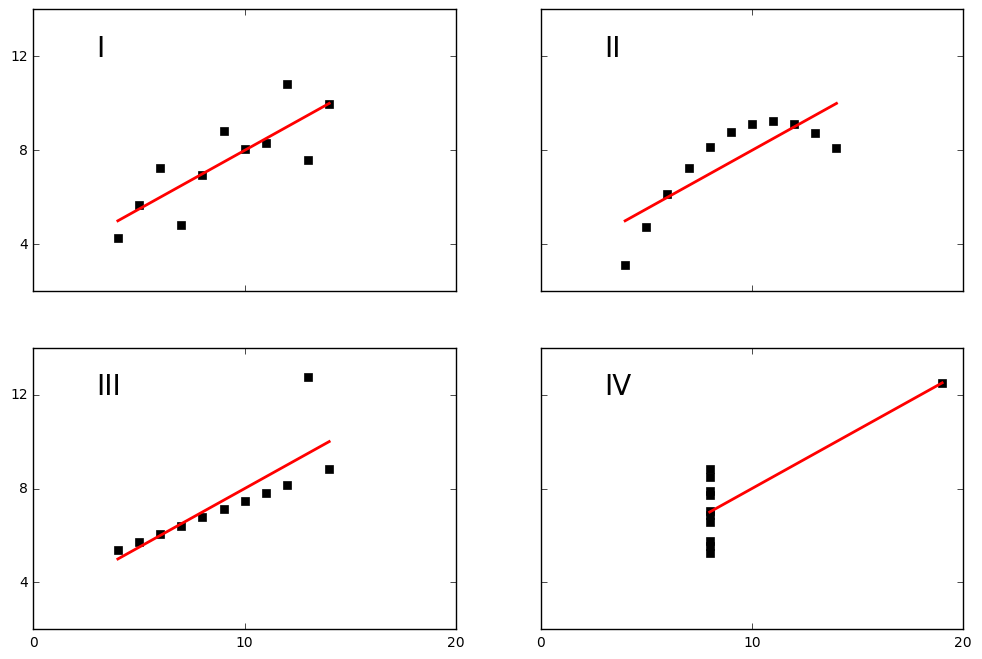

In [1]:
"""
See: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

Summary statistics are dangerous and nothing can replace actually plotting the data.
"""


from numpy import array, amin, amax
import matplotlib.pyplot as plt
%matplotlib inline


def fit(x):
    return 3+0.5*x


def anscombe():
    x =  array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

    xfit = array( [amin(x), amax(x) ] )

    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'I', fontsize=20)

    plt.subplot(222)
    plt.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    plt.text(3,12, 'II', fontsize=20)

    plt.subplot(223)
    plt.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.text(3,12, 'III', fontsize=20)
    plt.setp(plt.gca(), yticks=(4,8,12), xticks=(0,10,20))

    xfit = array([amin(x4),amax(x4)])

    plt.subplot(224)
    plt.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'IV', fontsize=20)

    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))

anscombe()

Overall, problems with only seeing the correlation:

1. It only captures linear relationship, not other relationships.
2. It doesn't capture slope at all; it only captures linear relationships (minus noise).
3. There are many dataset which have the same correlation even though they are way different.

You can't replace the power of just plotting the data and looking at it.

**END OF MORNING**

<br><br><br><br><br>

## Probability Trees

### Matthew Drury's Probabilty Problem:

You have a shuffled deck of 60 cards containing the following cards of special interest:
  - Three of the cards in the deck are marked with a diamond.
  - Three of the cards are marked with a star.  
  - The remaining cards are nothing special.

You draw an initial hand of five cards, after which you *must* discard any of the star cards
for an additional three cards drawn from the top of the deck. This process is repeated until
you find yourself with a hand that does *not* contain any star cards. Write a simulation to
approximate the probability that your initial draw results in a final hand containing a diamond card.

<br><font color='red'>Write two programs:</font>
1. The first program should run many many (like, 100,000) random simulations of the process above, then it should estimate the probability of your final hand containing a diamond card based on the result of the simulations.
2. The second program should _directly_ compute the probability of your final hand containing a diamond card by building and evaluation a full probability tree.

(see `prob_program.py` for the solution to part 2 above)

## Continuous vs Discrete (Random) Variables

All above, we only talked about _discrete_ random variables (although we didn't use that term until now). However, a random variable (or a variable in general) need not be discrete. Here's the difference between _discrete_ and _continuous_: [ref](https://en.wikipedia.org/wiki/Continuous_and_discrete_variables)

**Discrete**: there is a positive, minimum difference between two values the variable can take

**Continuous**: between two values the variable can take, there are uncountably infinite other values the variable can take

Another way to put it: There are measurable "gaps" between value of a discrete variable, where the gaps between values of a continuous variable can be made infinitesimal.

### Probability Mass Function (PMF)

The PMF of a r.v. $X$ gives the probabilities of every outcome in the support $S$ of r.v. $X$. For example:

<img src="images/pmf.png" width=400px>

<br><font color='red'><center>Draw a PMF for a single random variable $X$ that is the sum of two 6-sided dice?</center></font>

### Probability Density Function (PDF)

The PDF of a r.v. $X$ gives the relative likelihood of a random variable's support. PDFs should not be interpreted the same as a PMF; with a PDF you only can interpret area-under-the-curve.

<img src="images/pdf.png" width=400px>

<br><font color='red'><center>What is the probability that I sample the r.v. and get exactly 0.0?<br>I.e. $P(X=0.0)=$ ???</center></font>

### Recall: Expectation and Variance

For **discrete** random variables (let $P$ be the PMF of the r.v. $X$):

$$E(X) = \sum_{s \in S} s * P(X=s)$$

$$Var(X) = \sum_{s \in S} (s-E(X))^2 * P(X=s)$$

For **continuous** random variables (let $f$ is the PDF of r.v. $X$):

$$E(X) = \int_{x=-\infty}^{\infty} x * f(x) dx$$

$$Var(X) = \int_{x=-\infty}^{\infty} (x-E(X))^2 * f(x) dx$$

___

<font color='red'><center>What is the difference between $E(X)$ and the mean of $X$?</center></font>

## Major Probability Distributions

All you need to build a distribution is a PMF (if discrete) or a PDF (if continuous), and define the support. For it to be legit, the PMF must be non-negative and sum to 1 over the support.

Next, you derive the mean and variance using the PMF (or PDF), the support, and the definition of mean and variance. See [this](http://filestore.aqa.org.uk/subjects/AQA-MS03-W-2-SM.PDF) (or this [local copy](misc/AQA-MS03-W-2-SM.PDF)) for a derivation of the mean and variance for all the distributions below.

### Discrete Distributions:

#### Bernoulli

$X \sim \text{Bernoulli}(p)$:  
A single coin flip turns up heads with probability $p$.

PMF: $P[success] = p$ , $P[failure] = 1-p$

Support: $\{\text{success}, \text{failure}\}$

Mean: $p$

Variance: $p (1-p)$

<img src="images/bernoulli.png" width=400px>

#### Binomial

$X \sim \text{Binomial}(n, p)$:  
The number of coin flips out of n which turn up heads.

PMF: $P[X=k] = {n \choose k} p^k (1-p)^{n-k}$

Support: $k \in \{0,1,...,n\}$

Mean: $np$

Variance: $np(1-p)$

<img src="https://upload.wikimedia.org/wikipedia/commons/7/75/Binomial_distribution_pmf.svg" width=400px>

#### Geometric

$X \sim \text{Geometric}(p)$:  
The number of trials until a coin flip turns up heads.

PMF: $P[X=k] = p(1-p)^{k-1}$

Support: $k \in \{0,1,...\}$

Mean: $\frac{1}{p}$

Variance: $\frac{1-p}{p^2}$

<img src="images/geometric.png" width=400px>

#### Poisson

$X \sim \text{Poisson}(\lambda)$:  
The number of taxis passing a street corner in a given hour (on avg, 10/hr, so $\lambda=10$).

PMF: $P[X=k] = \frac{ \lambda^k e^{-\lambda} }{ k! }$

Support: $k \in \{0,1,2,...\}$

Mean: $\lambda$

Variance: $\lambda$

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg" width=400px>

This is a good time to mention the [Gambler's fallacy](https://en.wikipedia.org/wiki/Gambler%27s_fallacy). Does the Poisson distribution disagree with the fallacy?

### Continuous Distributions:

#### Uniform

$X \sim \text{Uniform}(a, b)$:  
Degrees between hour hand and minute hand ($a=0, b=360$).

PDF: $f(x) = \frac{1}{b-a}$

Support: $x \in [a, b]$

Mean: $\frac{a+b}{2}$

Variance: $\frac{(b-a)^2}{2}$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg" width=400px>

#### Normal (a.k.a., Gaussian)

$X \sim \text{Gaussian}(\mu, \sigma)$:  
IQ Scores (if $\mu = 100, \sigma = 10$)

PDF: $f(x) = \frac{ 1 }{ \sigma \sqrt{2 \pi} } \exp(- \frac{ (x-\mu)^2 }{ 2 \sigma^2 })$

Support: $x \in (-\infty, \infty)$

Mean: $\mu$

Variance: $\sigma^2$

<img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg" width=400px>

#### Exponential

$X \sim \text{Exponential}(\lambda)$:  
Number of minutes until a taxi will pass street corner (if on average 10 taxis pass per hour; $\lambda=10/60$ the number of taxis per minute)

CDF: $f(x) = \lambda \exp(\lambda x)$

Support: $x \in [0, \infty)$

Mean: $\frac{1}{\lambda}$

Variance: $\frac{1}{\lambda^2}$

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Exponential_pdf.svg" width=400px>

## Joint Probability Distribution

The probability of pairs of events from two (or more) random variables:

$$P(A=a, B=b)$$

If two random variables, also called a __bivariate distribution__ or if more random variables, called a __multivariate distribution__.

Always true:

$$P(A=a, B=b) = P(A=a | B=b) * P(B=b)$$

If independent:

$$P(A=a, B=b) = P(A=a) * P(B=b)$$

Always (if discrete):

$$1 = \sum_{a \in S_A} \sum_{b \in S_B} P(A=a, B=b)$$

Always (if continuous):

$$1 = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(a, b) \, da \, db$$

## Marginalization

Marginalization takes a (possibly _dependent_) multivariate distribution and considers only a single variable using the _Law of Total Probability_.

Accomplished by summing (if discrete) or integrating (if continuous).

**If continuous:**

$$f_X(x) = \int_{-\infty}^\infty f_{XY}(x,s) ds$$

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png)

**If discrete:**

$$P(X) = \sum_{y \in S_Y} P(X, Y=y)$$

||x1|x2|x3|x4|py(Y)|
|---|---|---|---|---|
|**y1**|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$|
|**y2**|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$|
|**y3**|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$|
|**y4**|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$|
|**px(X)**|$\frac{16}{32}$|$\frac{8}{32}$|$\frac{4}{32}$|$\frac{4}{32}$|1|
